Class distribution: Counter({0: 900, 1: 100})


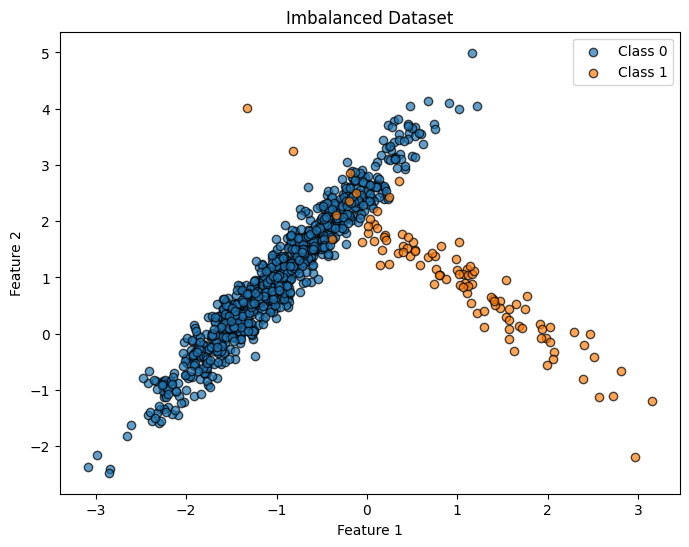

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


X, y = make_classification(
    n_samples=1000,      # Total number of samples
    n_features=2,        # Number of features
    n_informative=2,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # Class imbalance (90% to class 0, 10% to class 1)
    flip_y=0,            
    random_state=42
)

class_counts = Counter(y)
print(f"Class distribution: {class_counts}")

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.7, edgecolor='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.7, edgecolor='k')
plt.title("Imbalanced Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [2]:
from collections import Counter
print(f"Class distribution: {Counter(y)}")


Class distribution: Counter({0: 900, 1: 100})


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       264
           1       1.00      0.89      0.94        36

    accuracy                           0.99       300
   macro avg       0.99      0.94      0.97       300
weighted avg       0.99      0.99      0.99       300



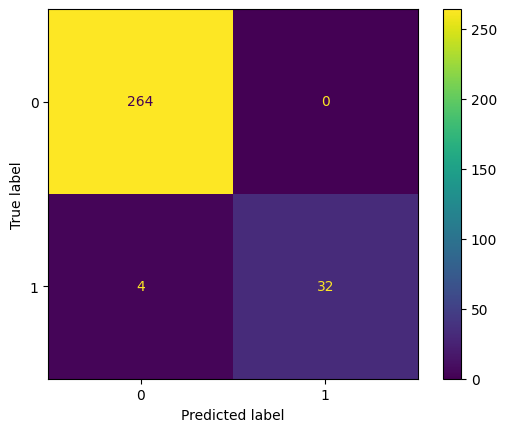

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

clf_smote = LogisticRegression(random_state=42)
clf_smote.fit(X_resampled, y_resampled)

y_pred_resampled = clf_smote.predict(X_test)
print(classification_report(y_test, y_pred_resampled))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       264
           1       0.92      0.92      0.92        36

    accuracy                           0.98       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.98      0.98      0.98       300

